# Lab 10 - Ideal Gas
#### Daisy L Whitfield
---

In [30]:
import numpy as np
import matplotlib.pyplot as plt

---
##### Exercise 10.1 - Maxwell-Boltzman Distribution

In [41]:
# computational system of units:
M = 1 # mass of gas particles, M0 = 4.65E-26 kg
T = 1 # Temperature of gas, T0 = 293 K
kb = 1 # Boltzmans constant

In [42]:
def mbspeed(v):
    return (M*v / (kb*T))*np.exp(-M*v** 2/(2*kb*T))

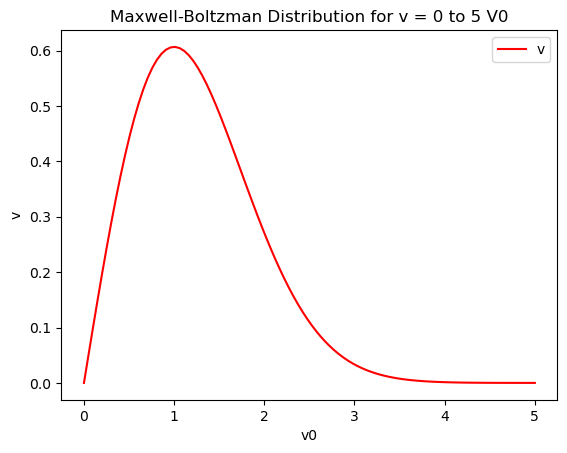

In [107]:
v = np.array([])
v0 = np.linspace(0,5,100)

v = np.append(v, mbspeed(v0))
    

plt.plot(v0,v,"r-", label = "v")
plt.title("Maxwell-Boltzman Distribution for v = 0 to 5 V0")
plt.legend(frameon = True)
plt.legend(loc=1)
plt.xlabel("v0")
plt.ylabel("v")
plt.show()

---
##### Exercise 10.2 - Question Time!

The plot in the previous graph would not need to be changed if we set m0 to a different value because we've already "normalized" the equation to allow us to use T and Kb equal to 1 *with respect to* m0.  The value of T = 2 t0 is roughly 0.42 which, in SI units, is 123 K.  This means that changing the value of m0 would not affect this temperature value, which means that we have chosen a unit system that allows us to perform calculations as if we were using variables only.

---
##### Exercise 10.3 - Collision Model

In [56]:
def collide(ax ,ay ,bx ,by ,theta):
    ux = (ax - bx) / 2
    uy = (ay - by) / 2
    dax = ux * (np.cos(theta) - 1) - (uy * np.sin(theta))
    day = uy * (np.cos(theta) - 1) + (ux * np.sin(theta))
    ax = ax + dax
    ay = ay + day
    bx = bx - dax
    by = by - day
    return ax , ay , bx , by # updated values

In [57]:
tau = 2*np.pi # Using 2 pi is like saying twice half-way...
# lab frame is cms, incoming on x axis:
print(np.around(collide(1,0,-1,0,0),2)+0)
print(np.around(collide(1,0,-1,0,tau/4),2)+0)
print(np.around(collide(1,0,-1,0,tau/2),2)+0)
print(np.around(collide(1,0,-1,0,3*tau/4),2)+0)

[ 1.  0. -1.  0.]
[ 0.  1.  0. -1.]
[-1.  0.  1.  0.]
[ 0. -1.  0.  1.]


In [58]:
# lab frame is cms, incoming on y axis:
print(np.around(collide(0,1,0,-1,0),2)+0)
print(np.around(collide(0,1,0,-1,tau/4),2)+0)
print(np.around(collide(0,1,0,-1,tau/2),2)+0)
print(np.around(collide(0,1,0,-1,3*tau/4),2)+0)

[ 0.  1.  0. -1.]
[-1.  0.  1.  0.]
[ 0. -1.  0.  1.]
[ 1.  0. -1.  0.]


---
##### Exercise 10.4 - Collision Model (cont'd)

In [59]:
# boost along x axis, incoming on y axis:
print(np.around(collide(1,1,1,-1,0),2)+0)
print(np.around(collide(1,1,1,-1,tau/4),2)+0)
print(np.around(collide(1,1,1,-1,tau/2),2)+0)
print(np.around(collide(1,1,1,-1,3*tau/4),2)+0)

[ 1.  1.  1. -1.]
[0. 0. 2. 0.]
[ 1. -1.  1.  1.]
[2. 0. 0. 0.]


---
##### Exercise 10.5 - Collision Model (cont'd)

In [60]:
# test with random values:
print(np.around(collide(6.24, 1.78, 3.35, 5.98, 3.19),2))
print(np.around(collide(4.07, 4.69, 1.61, 4.54, 2.46),2))
print(np.around(collide(5.28, 2.99, 4.77, 5.22, 3.15),2))
print(np.around(collide(2.84, 5.37, 5.47, 6.16, 1.59),2))

[3.25 5.91 6.34 1.85]
[1.84 5.33 3.84 3.9 ]
[4.76 5.22 5.29 2.99]
[4.58 4.46 3.73 7.07]


---
##### Exercise 10.6 - Initializing the Simulated Ideal Gas

In [172]:
NGAS = 10000
vx = np.random.uniform(-2,2, NGAS)
vy = np.random.uniform(-2,2, NGAS)

In [68]:
print(vx)
print(vy)

[ 1.76101982 -1.753109   -0.47727821  0.33399392 -0.4630112 ]
[-0.22952471 -0.00597902 -0.31930816 -1.39902349  1.42550525]


---
##### Exercise 10.7 - Histogram of Vx

<ErrorbarContainer object of 3 artists>

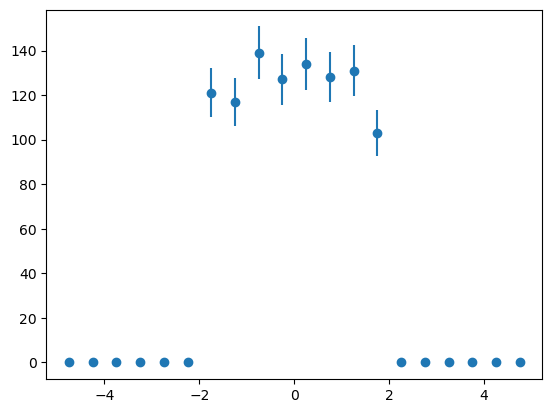

In [73]:
hvx ,bins = np.histogram(vx ,bins=20 ,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvx ,yerr=np.sqrt(hvx),fmt="o")

---
##### Exercise 10.8 - Histogram of Vy

<ErrorbarContainer object of 3 artists>

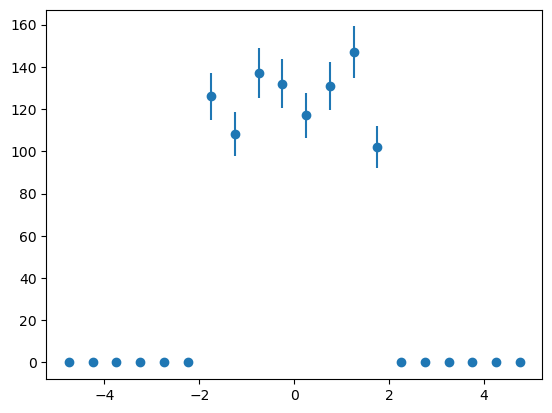

In [74]:
hvx ,bins = np.histogram(vy ,bins=20 ,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvx ,yerr=np.sqrt(hvx),fmt="o")

---
##### Exercise 10.9 - Simulations of Collisions of an Ideal Gas

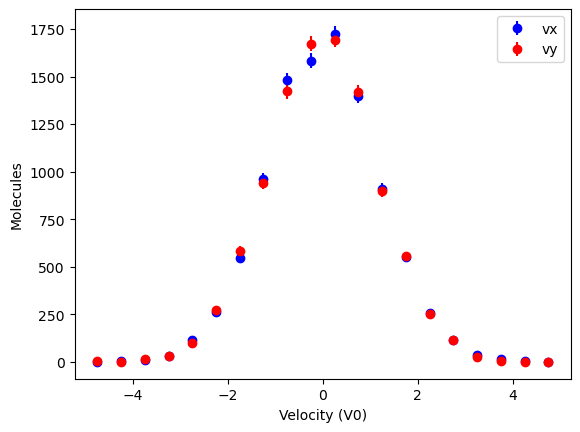

In [190]:
index = np.array(NGAS)
indexT = np.random.uniform(0, (2 * np.pi), NGAS)

for i in range(NGAS * 100):
    a = np.random.choice(index)
    b = np.random.choice(index)

    theta = np.random.choice(indexT)

    vx[a], vy[a], vx[b], vy[b] = collide(vx[a], vy[a], vx[b], vy[b], theta)

hvx ,bins = np.histogram(vx ,bins=20 ,range=(-5,5))
hvy ,bins = np.histogram(vy ,bins=20 ,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvx ,yerr=np.sqrt(hvx),fmt="bo",label="vx")
plt.errorbar(cbins ,hvy ,yerr=np.sqrt(hvx),fmt="ro",label="vy")
plt.xlabel("Velocity (V0)")
plt.ylabel("Molecules")
plt.legend()

---
##### Exercise 10.10 - Estimating kT

In [96]:
index = np.array(NGAS)
indexT = np.random.uniform(0, (2 * np.pi), NGAS)

kt = (np.mean(vx ** 2) + np.mean(vy ** 2)) / 2
print(kt)

for i in range(NGAS * 10):
    a = np.random.choice(index)
    b = np.random.choice(index)

    theta = np.random.choice(indexT)

    vx[a], vy[a], vx[b], vy[b] = collide(vx[a], vy[a], vx[b], vy[b], theta)

kt = (np.mean(vx ** 2) + np.mean(vy ** 2)) / 2
print(kt)

1.2728545447715245
1.2728545447715245


---
##### Exercise 10.11 - Plotting Histograms to Verify Results Match

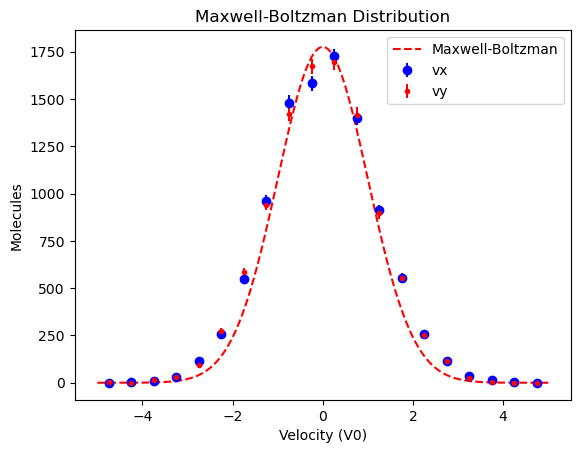

In [191]:
def P(v):
    return np.sqrt(1 / (2 * np.pi)) * np.exp((-1 * v ** 2) / 2)

ig = np.array([])
x = np.linspace(-5,5,NGAS)

ig = P(x) * 4450



plt.plot(x ,ig,"--r", label = "Maxwell-Boltzman")
plt.title("Maxwell-Boltzman Distribution")
plt.legend(frameon = True)
plt.legend(loc=1)
hvx ,bins = np.histogram(vx ,bins=20 ,range=(-5,5))
hvy ,bins = np.histogram(vy ,bins=20 ,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvx ,yerr=np.sqrt(hvx),fmt="bo",label="vx")
plt.errorbar(cbins ,hvy ,yerr=np.sqrt(hvx),fmt="r.",label="vy")
plt.xlabel("Velocity (V0)")
plt.ylabel("Molecules")
plt.legend()
plt.show()

---
##### Exercise 10.12 - Plotting Histograms to Verify Results Match (cont'd)

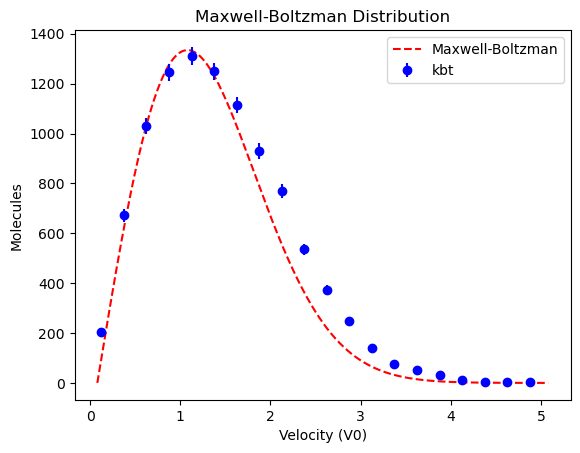

In [274]:
ig = np.array([])
kbt = np.array([])
x = np.linspace(0,5,NGAS)

ig = mbspeed(x) * 2200

for i in range(NGAS):
    kbt = np.append(kbt, (np.sqrt(vx[i] ** 2 + vy[i] ** 2)))

plt.plot((x + 0.08) ,ig,"--r", label = "Maxwell-Boltzman")
plt.title("Maxwell-Boltzman Distribution")
plt.legend(frameon = True)
plt.legend(loc=1)
hvx ,bins = np.histogram(kbt ,bins=20 ,range=(0,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvx ,yerr=np.sqrt(hvx),fmt="bo",label="kbt")
plt.xlabel("Velocity (V0)")
plt.ylabel("Molecules")
plt.legend()
plt.show()